### Seaborn Sample Data & Fitting

In [1]:
#common imports to bring into your notebook
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import scipy.stats as st 
from fitter import Fitter
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

#set color style
sns.set(color_codes=True)

#### Link datasets: https://github.com/mwaskom/seaborn-data

In [2]:
#list of all read ins for sns datasets

# anscombe
anscombe_df = sns.load_dataset("anscombe")

# attention
attention_df = sns.load_dataset("attention")

# brain_networks
brain_networks_df = sns.load_dataset("brain_networks")

# car_crashes
car_crashes_df = sns.load_dataset("car_crashes")

# diamonds
diamonds_df = sns.load_dataset("diamonds")

# dots
dots_df = sns.load_dataset("dots")

# exercise
exercise_df = sns.load_dataset("exercise")

# flights
flights_df = sns.load_dataset("flights")

# fmri
fmri_df = sns.load_dataset("fmri")

# geyser
geyser_df = sns.load_dataset("geyser")

# iris
iris_df = sns.load_dataset("iris")

# planets
planets_df = sns.load_dataset("planets")

# tips
tips_df = sns.load_dataset("tips")

# titanic
titanic_df = sns.load_dataset("titanic")

### tips dataset

In [10]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


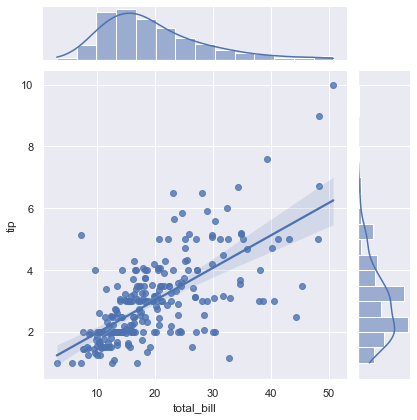

In [14]:
#jointplot
sns.jointplot(x = "total_bill", y = "tip", data = tips_df, kind = "reg")
plt.show()

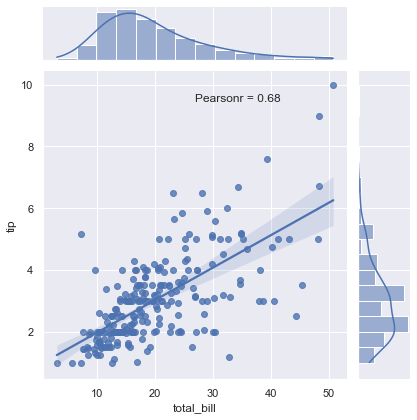

In [13]:
jp = sns.jointplot(x="total_bill", y="tip", data=tips_df, kind="reg")
jp.ax_joint.annotate("Pearsonr = {:.2f}".format(st.pearsonr(tips_df["total_bill"], tips_df["tip"])[0]),
                     xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12)
plt.show()

In [15]:
data1 = tips_df["total_bill"]
data2 = tips_df["tip"]

In [16]:
f1 = Fitter(data1)
f2= Fitter(data2)

In [17]:
f1.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


In [18]:
f2.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norminvgauss,0.018355,910.114061,924.102734,inf,0.027330,0.991037
genhyperbolic,0.018356,910.220751,927.706592,inf,0.028761,0.984240
moyal,0.018363,904.458601,911.452938,inf,0.028700,0.984584
johnsonsu,0.018386,911.803349,925.792022,inf,0.028888,0.983498
exponnorm,0.018407,904.665791,915.157296,inf,0.026173,0.994715


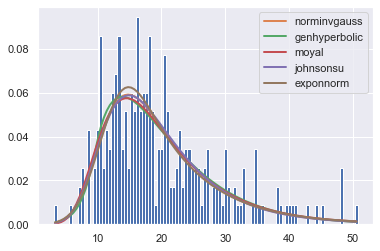

In [19]:
f1.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,4.109101,657.191641,667.683146,inf,0.114706,0.002975
dgamma,4.118580,849.131755,859.623260,inf,0.105588,0.008013
fatiguelife,4.215499,674.345158,684.836663,inf,0.086866,0.047358
johnsonsb,4.215756,675.528355,689.517028,inf,0.086806,0.047601
invgauss,4.215916,673.008819,683.500324,inf,0.087833,0.043575


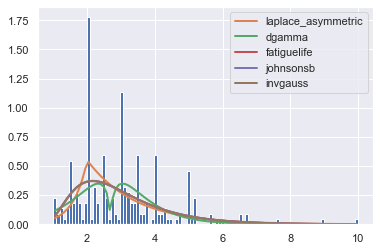

In [20]:
f2.summary()

### Assuming Normality

In [22]:
#begin to standardize bill and tip data, to compare them on a singular, standard, scale
mean_bill = tips_df["total_bill"].mean()
stdev_bill = tips_df["total_bill"].std(ddof = 1)

mean_tip = tips_df["tip"].mean()
stdev_tip = tips_df["tip"].std(ddof = 1)

In [23]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips_df["Stand_bill"] = (tips_df["total_bill"] - mean_bill / stdev_bill)

In [25]:
tips_df["Stand_tip"] = (tips_df["tip"] - mean_tip / stdev_tip)

In [26]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,Stand_bill,Stand_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,14.767463,-1.156953
1,10.34,1.66,Male,No,Sun,Dinner,3,8.117463,-0.506953
2,21.01,3.50,Male,No,Sun,Dinner,3,18.787463,1.333047
3,23.68,3.31,Male,No,Sun,Dinner,2,21.457463,1.143047
4,24.59,3.61,Female,No,Sun,Dinner,4,22.367463,1.443047
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,26.807463,3.753047
240,27.18,2.00,Female,Yes,Sat,Dinner,2,24.957463,-0.166953
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.447463,-0.166953
242,17.82,1.75,Male,No,Sat,Dinner,2,15.597463,-0.416953


### Normal Data: Probability Plots with Means

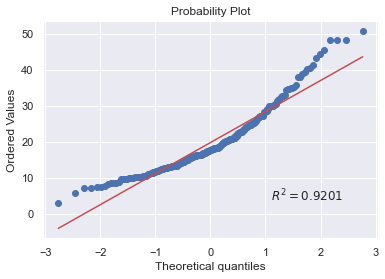

In [27]:
st.probplot(tips_df["total_bill"], dist = "norm", fit = True, rvalue = True, plot = plt)
plt.show()

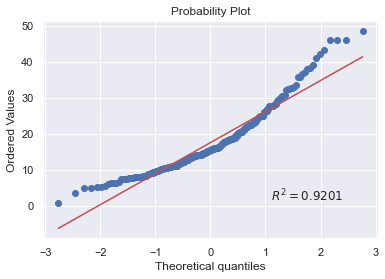

In [28]:
st.probplot(tips_df["Stand_bill"], dist = "norm", fit = True, rvalue = True, plot = plt)
plt.show()

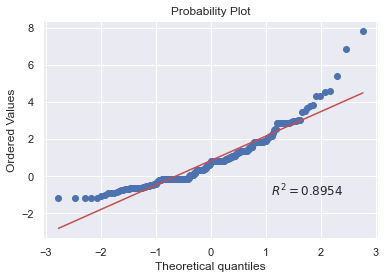

In [29]:
st.probplot(tips_df["Stand_tip"], dist = "norm", fit = True, rvalue = True, plot = plt)
plt.show()

In [30]:
tips_df.describe()

,total_bill,tip,size,Stand_bill,Stand_tip
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,17.563405,0.831326
std,8.902412,1.383638,0.951100,8.902412,1.383638
min,3.070000,1.000000,1.000000,0.847463,-1.166953
25%,13.347500,2.000000,2.000000,11.124963,-0.166953
50%,17.795000,2.900000,2.000000,15.572463,0.733047
75%,24.127500,3.562500,3.000000,21.904963,1.395547
max,50.810000,10.000000,6.000000,48.587463,7.833047


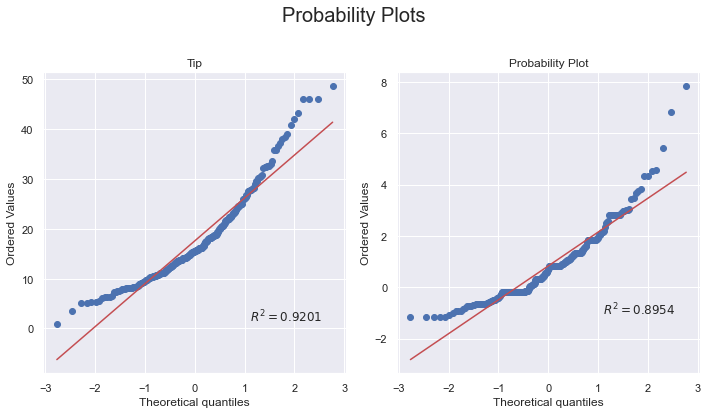

In [36]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
res = st.probplot(tips_df["Stand_bill"], dist = "norm", fit = True, rvalue = True, plot = plt)
ax1.set_title("Bill")

ax2 = plt.subplot(222)
res = st.probplot(tips_df["Stand_tip"], dist = "norm", fit = True, rvalue = True, plot = plt)
ax1.set_title("Tip")

plt.suptitle("Probability Plots", y=1.01, fontsize = 20)
plt.tight_layout()
plt.show()

### Normal Data: Categorical Confidence Intervals

#### diamonds data set 

In [37]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
#!pip install statsmodels

In [38]:
diamonds_df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [45]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest

In [46]:
21551/53940

0.3995365220615499

In [48]:
0.3995365220615499 - 0.39540305804708686

0.0041334640144630175

##### proportion_confint

In [47]:
proportion_confint(count = 21551, nobs = 53940, alpha = 0.05)

(0.39540305804708686, 0.4036699860760129)

#### We are 95% confident that the true value of the population proportion of diamonds that are "ideal" in their cut is between 39,54% and 40,37%

##### proportion_ztest

In [51]:
#always consider alpha of 0.05
#claim from expert is thtat at least 41% of diamonds are ideal cut.
#alternative : "two-sided", "smaller", "larger"

#H0: = 0.40
#Ha: not  , <     ,>
proportions_ztest(count = 21551, nobs = 53940, value = 0.40, alternative = "smaller")

#output is going to be; value of the test statistic...second is the p-value

(-0.21976726150576256, 0.4130262089157087)

In [52]:
#always consider alpha of 0.05
#claim from expert is thtat at least 41% of diamonds are ideal cut.
#alternative : "two-sided", "smaller", "larger"

#H0: = 0.40
#Ha: not  , <     ,>
proportions_ztest(count = 21551, nobs = 53940, value = 0.42, alternative = "smaller")

#output is going to be; value of the test statistic...second is the p-value

(-9.703164130002184, 1.46145350815804e-22)

##### Since the Pvalue of 0.00000__146 is less than 0.05, we reject the null hypothesis. Thus, we have sufficient evidence to say that the true proportion of diamonds that are "ideal" cut is less than 42% 

In [54]:
diamonds_df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [57]:
def two_proportions_confint(success_a, size_a, success_b, size_b, significance):
    
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1- prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)
    
    # z score also called a critical value
    confidence = 1 -significance
    z = st.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)
    
    #standard formula for the to calculate a confidence interval
    #point-estimate (p hat) + & - z * the standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

In [61]:
#lets test it with premium
prop_diff, confint = two_proportions_confint(13791, 53940, 12082, 53940, 0.05)
print("Est.Diff.:", prop_diff)
print("Conf. Int.:", confint)

Est.Diff.: -0.03168335187245086
Conf. Int.: [-0.03677568 -0.02659102]


###### Prop A was a Premium, Prop B was Very Good

PropB - PropA = 0

***We look if 0 is in the interval...if it is... can not say they are different

***(- -) that  means PropA is larger

***(+ +) that means PropBV is larger

In [71]:
def two_proportions_ztest(success_a, size_a, success_b, size_b):
    
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 /size_a + 1/ size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - st.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue     

In [72]:
zscore, pvalue = two_proportions_ztest(13791, 53940, 12082, 53940)
print("Zscore:", zscore)
print("Pvaluie:", pvalue)

Zscore: 12.186070182309017
Pvaluie: 0.0


### ANOVA 

In [6]:
import pingouin as pg

In [10]:
df = pg.read_dataset("anova")

In [9]:
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [11]:
df["Hair color"].value_counts()

Hair color
Light Blond       5
Dark Blond        5
Dark Brunette     5
Light Brunette    4
Name: count, dtype: int64

In [12]:
#drop subject column
df = df.drop(columns = "Subject", axis = 1)

In [14]:
df.head(10)

,Hair color,Pain threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48
5,Dark Blond,63
6,Dark Blond,57
7,Dark Blond,52
8,Dark Blond,41
9,Dark Blond,43


##### little of cleaning, specific for statsmodels

##### lower case, and replace a "space" with a "_" in our headers


In [15]:
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

In [16]:
df.head(5)

,hair_color,pain_threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48


##### check out statsmodels version of ANOVA

In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

ols_model = smf.ols("pain_threshold ~ hair_color", data=df).fit()

anova1 = sm.stats.anova_lm(ols_model)

anova1

,df,sum_sq,mean_sq,F,PR(>F)
hair_color,3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


In [21]:
anova2 = pg.anova(dv='pain_threshold', between='hair_color', data =df, detailed=True)

anova2

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


In [22]:
anova3 = pg.welch_anova(dv='pain_threshold', between='hair_color', data =df)

anova3

,Source,ddof1,ddof2,F,p-unc,np2
0,hair_color,3,8.329841,5.890115,0.018813,0.575962


##### pairwise_turkey

In [25]:
import researchpy as rp
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ajustar el modelo ANOVA
model = ols('pain_threshold ~ hair_color', data=df).fit()
anova_table = rp.summary_cont(model)

# Realizar la prueba post hoc de Tukey
posthoc = pairwise_tukeyhsd(df['pain_threshold'], df['hair_color'])

# Imprimir los resultados
print(anova_table)
print(posthoc)

This method only works with a Pandas Series, Dataframe, or Groupby object
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2     meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------
   Dark Blond  Dark Brunette    -13.8 0.0741 -28.6967  1.0967  False
   Dark Blond    Light Blond      8.0 0.4356  -6.8967 22.8967  False
   Dark Blond Light Brunette     -8.7 0.4147 -24.5004  7.1004  False
Dark Brunette    Light Blond     21.8 0.0037   6.9033 36.6967   True
Dark Brunette Light Brunette      5.1 0.7893 -10.7004 20.9004  False
  Light Blond Light Brunette    -16.7 0.0366 -32.5004 -0.8996   True
--------------------------------------------------------------------


### Non-Normal Data & Bootstrap

In [30]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

import numpy.random as npr

In [31]:
mean = 1000
stdev = 50

pop = np.random.normal(loc = mean, scale = stdev, size = 100000)

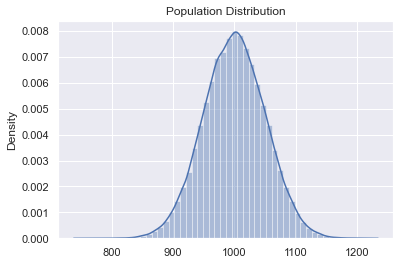

In [32]:
sns.distplot(pop, bins = 50, hist = True, kde = True)
plt.title("Population Distribution")
plt.show()

##### take 10000, samples from the larger population


In [33]:
samps = pop[:10000]

##### time to use bootstrap for mean and stdev

In [35]:
BS_mean = bs.bootstrap(samps, stat_func=bs_stats.mean)

BS_stdev = bs.bootstrap(samps, stat_func=bs_stats.std)

In [36]:
print("Bootstrapped mean should be: {}".format(mean))
print('\t' + str(BS_mean))
print(" ")
print("Bootstrapped stdev should be: {}".format(stdev))
print('\t' + str(BS_stdev))

Bootstrapped mean should be: 1000
	1000.3776547491066    (999.3984148520731, 1001.3633928720252)
 
Bootstrapped stdev should be: 50
	50.14479768252655    (49.46201720500141, 50.83809987441835)


In [42]:
samp_amount = [10, 30, 50, 100, 500, 1000]
#samp_amount = [10, 30, 50, 100, 500, 1000, 2500, 5000, 10000, 25000]
bootstrap_res = []

tdist_res = []

# for loop to handle our execution and iterations
for i in samp_amount:
    samps = np.random.choice(pop, i, replace=True)
    bsres = bs.bootstrap(samps, stat_func=bs_stats.mean, alpha = 0.05)
    
    tres = st.t.interval(0.95, len(samps)-1, loc = np.mean(samps), scale = st.sem(samps))
    
    bootstrap_res.append((bsres.lower_bound, bsres.upper_bound))
    tdist_res.append(tres)

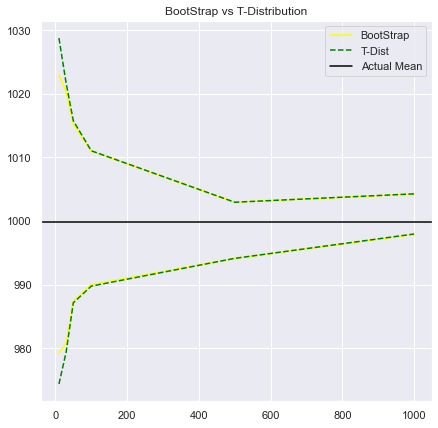

In [43]:
plt.subplots(figsize=(7,7))

plt.plot(samp_amount, [x[1] for x in bootstrap_res], color = "yellow")
plt.plot(samp_amount, [x[1] for x in tdist_res], linestyle="--", color = "green")

plt.plot(samp_amount, [x[0] for x in bootstrap_res], color = "yellow", label = "BootStrap")
plt.plot(samp_amount, [x[0] for x in tdist_res], linestyle="--", color = "green", label = "T-Dist")

plt.axhline(pop.mean(), color = "black", label = "Actual Mean")
plt.legend(loc = "best")
plt.title("BootStrap vs T-Distribution")
plt.show()